<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/Naive_Bayes_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import logsumexp
from sklearn import naive_bayes

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names

)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
class GaussianDistribution:
  def __init__(self,feature):
    self.mean = feature.mean(axis=0)
    self.std = feature.std(axis=0)

  def logpdf(self,value):
    return -0.5 * np.log(2.0 * np.pi * self.std**2) - (value - self.mean) ** 2 / (2 * self.std ** 2)

  def pdf(self,value):
    return np.exp(self.logpdf(value))


In [ ]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
  def fit(self,X,y,distribution=None):
    self.classes_ = np.unique(y)
    _ , self.n_features = X.shape

    if distribution == None:
      distribution = GaussianDistribution

    self.conditional_feature_distribution  = dict()

    for cl in self.classes_:
      feature_distribtions = []
      for index in range(self.n_features):
        features  = X[y == cl,index]
        fitted_distribution = distribution(features)
        feature_distribtions.append(fitted_distribution)
      self.conditional_feature_distribution[cl] = feature_distribtions
    self.prior_class_distribution = {
        cl: sum(y == cl) / len(y) for cl in self.classes_
      }

  def predict_log_prob(self,X):
      class_log_prob = np.zeros((len(X),len(self.classes_)),dtype=float)
      for cl_index, cl in enumerate(self.classes_):
        for index in range(self.n_features):
          class_log_prob[:,cl] += self.conditional_feature_distribution[cl][index].logpdf(X[:,index])
        class_log_prob[:,cl] += np.log(self.prior_class_distribution[cl])
      return class_log_prob

  def predict_prob(self,X):
      return np.exp(self.predict_log_prob(X))

  def predict(self,X):
      log_prob = self.predict_log_prob(X)
      return np.array([self.classes_[index] for index in log_prob.argmax(axis=1)])


In [ ]:
feature_names = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']
X = df[feature_names].to_numpy()
y = df['target']

In [ ]:
nb = NaiveBayes()
nb.fit(X,y)

# Naive Bayes using built in Library

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape)

(105, 4) (45, 4)


In [ ]:
nb.fit(X_train,y_train)

In [ ]:
print(
    f"Naive bayes accuracy on the train set = {nb.score(X_train,y_train)} and test set  = {nb.score(X_train,y_train)}"
)

Naive bayes accuracy on the train set = 0.9523809523809523 and test set  = 0.9523809523809523


In [ ]:
from sklearn import naive_bayes
nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(X_train,y_train)
print(
    f"Naive bayes accuracy on the train set = {nb_classifier.score(X_train,y_train)} and test set  = {nb_classifier.score(X_train,y_train)}"
)

Naive bayes accuracy on the train set = 0.9523809523809523 and test set  = 0.9523809523809523


In [ ]:
nb_log_prob = nb.predict_log_prob(X_test)
nb_classifier_log_prob = nb_classifier.predict_log_proba(X_test)

assert np.allclose(nb_log_prob,nb_classifier_log_prob), 'log probabilites do not match'
print("Seems alright")

AssertionError: log probabilites do not match

In [ ]:
nb_log_prob[:3]

array([[-220.12248816,   -1.66538864,   -7.08757695],
       [-259.69240564,   -2.78236393,   -5.28925209],
       [   1.23708738,  -34.1264984 ,  -61.52174176]])

In [ ]:
nb_classifier_log_prob[:3]

array([[-2.18461470e+02, -4.40774139e-03, -5.42659594e+00],
       [-2.56988369e+02, -7.83688765e-02, -2.58525696e+00],
       [-4.44089210e-16, -3.53635844e+01, -6.27588274e+01]])

In [ ]:
nb.predict_prob(X_test)[:3]

array([[2.52358565e-096, 1.89117145e-001, 8.35419179e-004],
       [1.64824300e-113, 6.18920258e-002, 5.04553247e-003],
       [3.44556323e+000, 1.51025422e-015, 1.91182015e-027]])

In [ ]:
nb_classifier.predict_proba(X_test)[:3]

array([[1.32858383e-095, 9.95601958e-001, 4.39804156e-003],
       [2.46246227e-112, 9.24623292e-001, 7.53767082e-002],
       [1.00000000e+000, 4.38319118e-016, 5.54865308e-028]])

In [ ]:
from scipy.special import logsumexp

In [ ]:
class FixedNaiveBayes(NaiveBayes):
  def predict_log_prob(self,X):
    class_log_prob = np.zeros((len(X),len(self.classes_)),dtype=float)
    for cl_index,cl in enumerate(self.classes_):
      for index in range(self.n_features):
        class_log_prob[:,cl_index] += self.conditional_feature_distribution[cl][index].logpdf(X[:,index])
      class_log_prob[:,cl_index] += np.log(self.prior_class_distribution[cl])
    for index in range(self.n_features):
      class_log_prob -= logsumexp(class_log_prob,axis = 1)[:,None]

    return class_log_prob


In [ ]:
fixed_nb = FixedNaiveBayes()
fixed_nb.fit(X_train,y_train)
nb_test_log_prob = fixed_nb.predict_log_prob(X_test)
sklearn_test_log_prob = nb_classifier.predict_log_proba(X_test)
assert np.allclose(nb_test_log_prob,sklearn_test_log_prob) , "Log probabilities do not match"
print("Seems Alright and Matched")

Seems Alright and Matched


# Categorical Naive Bayes

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
X = np.array([[1.5], [2.2], [3.1], [4.7], [5.8], [6.9], [7.5]])
X

array([[1.5],
       [2.2],
       [3.1],
       [4.7],
       [5.8],
       [6.9],
       [7.5]])

In [ ]:
kbins = KBinsDiscretizer(n_bins =3,encode='ordinal',strategy='uniform')
kbins_data = kbins.fit_transform(iris.data)


In [ ]:
discrete_df_iris = pd.DataFrame(
    data=kbins_data,
    columns=iris.feature_names
)
discrete_df_iris['target'] = iris.target
discrete_df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,0
3,0.0,1.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0


In [ ]:
discrete_X = discrete_df_iris[feature_names].to_numpy()
discrete_y = discrete_df_iris['target']
d_x_train,d_x_test,d_y_train,d_y_test = train_test_split(discrete_X,discrete_y,test_size=0.3)
d_x_train.shape,d_x_test.shape

((105, 4), (45, 4))

In [ ]:
cate_NB = naive_bayes.CategoricalNB()
cate_NB.fit(d_x_train,d_y_train)

CategoricalNB()

In [ ]:

print(
    "Naive Bayes classifier accuracy on\n    the train set: {}\n    the test set: {}".format(
        cate_NB.score(d_x_train,d_y_train),
        cate_NB.score(d_x_test,d_y_test)
    )
)

Naive Bayes classifier accuracy on
    the train set: 0.9904761904761905
    the test set: 0.9333333333333333


# K Nearest Neighbours

In [ ]:

class KNN(BaseEstimator,ClassifierMixin):
    def __init__(self,k = 3):
        self.k = k
    def fit(self,X,y):
        pass

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print(f"The accuracy for Knn on train data = {knn.score(X_train,y_train)}")
print(f"The accuracy for Knn on train data = {knn.score(X_test,y_test)}")

The accuracy for Knn on train data = 0.9809523809523809
The accuracy for Knn on train data = 0.9111111111111111


# KNN for Regression Task

In [ ]:
X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([2.0, 2.5, 3.5, 5.0, 6.5])

In [ ]:
x_new = 2.5
K = 3

In [ ]:
dis = np.abs(x_new - X_train)
sorted_indic = np.argsort(dis)
dis,sorted_indic


(array([1.5, 0.5, 0.5, 1.5, 2.5]), array([1, 2, 0, 3, 4]))

In [ ]:
idx = sorted_indic[:K]
nearst_distances = dis[idx]
nearest_y = y_train[idx]
nearst_distances,nearest_y

(array([0.5, 0.5, 1.5]), array([2.5, 3.5, 2. ]))

In [ ]:
#Average Wieght
y_predicted = np.mean(nearest_y)
y_predicted

2.6666666666666665

In [ ]:
#Weighted Sum
weights = 1/(nearst_distances + 1e-10)
weights

array([2.        , 2.        , 0.66666667])

In [ ]:
y_predicted_wighted = np.sum (weights * nearest_y) /np.sum(weights)
y_predicted_wighted

2.8571428571265307

# Using Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print(f'The accuracy on train data = {knn.score(X_train,y_train)}')
print(f'The accuracy on test data = {knn.score(X_test,y_test)}')

The accuracy on train data = 1.0
The accuracy on test data = 0.9555555555555556


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def make_meshgrid(data:np.ndarray,step:float = 0.05,border:float = 0.5):
    x_min,x_max = data[:,0].min() - border, data[:,0].max() + border
    y_min,y_max = data[:,1].min() - border, data[:,1].max() + border
    return np.meshgrid(np.arange(x_min,x_max,step), np.arange(y_min,y_max,step))
def decision_surface(estimator,X_train,y_train,X_test,y_test):
    colors = ListedColormap(['red','green','blue'])
    light_colors = ListedColormap(["lightcoral", "lightblue", "lightyellow"])
    knn.fit(X_train,y_train)
    fig = plt.figure(figsize=(16,6))
    fig.suptitle(estimator)
    plt.subplot(1,2,1)
    xx,yy = make_meshgrid(X_train)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(),yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap=colors)
    acc = accuracy_score(y_train, estimator.predict(X_train))
    plt.title(f"Train data, accuracy={acc:.2f}")

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading="auto")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, cmap=colors)
    acc = accuracy_score(y_test, estimator.predict(X_test))
    plt.title(f"Test data, accuracy={acc:.2f}")

    plt.show()

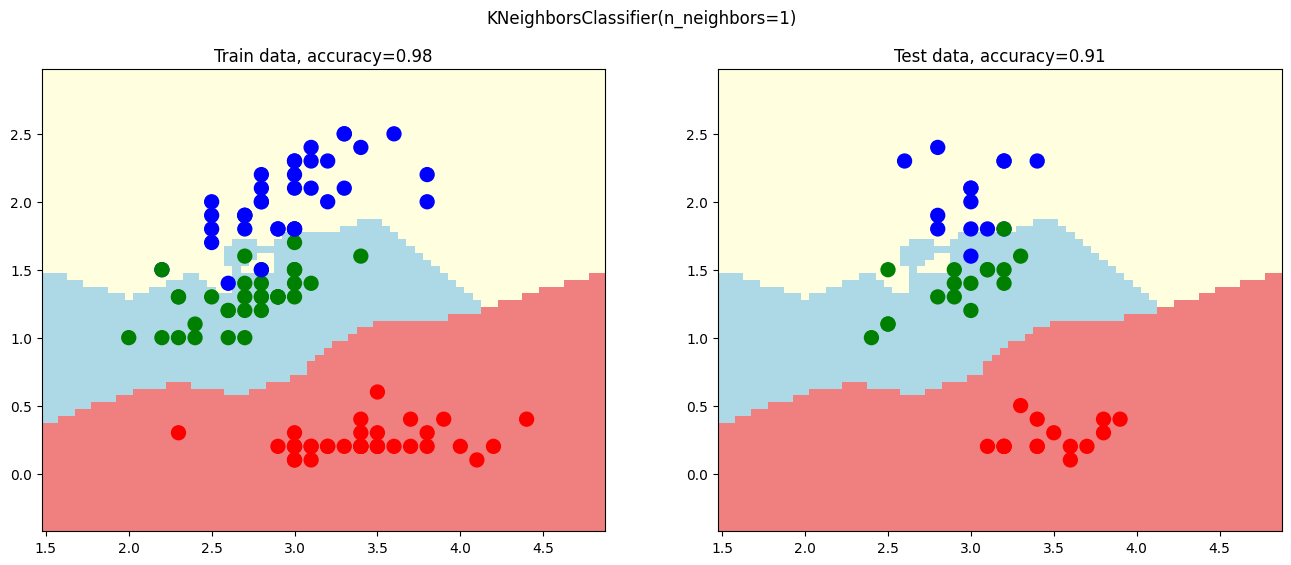

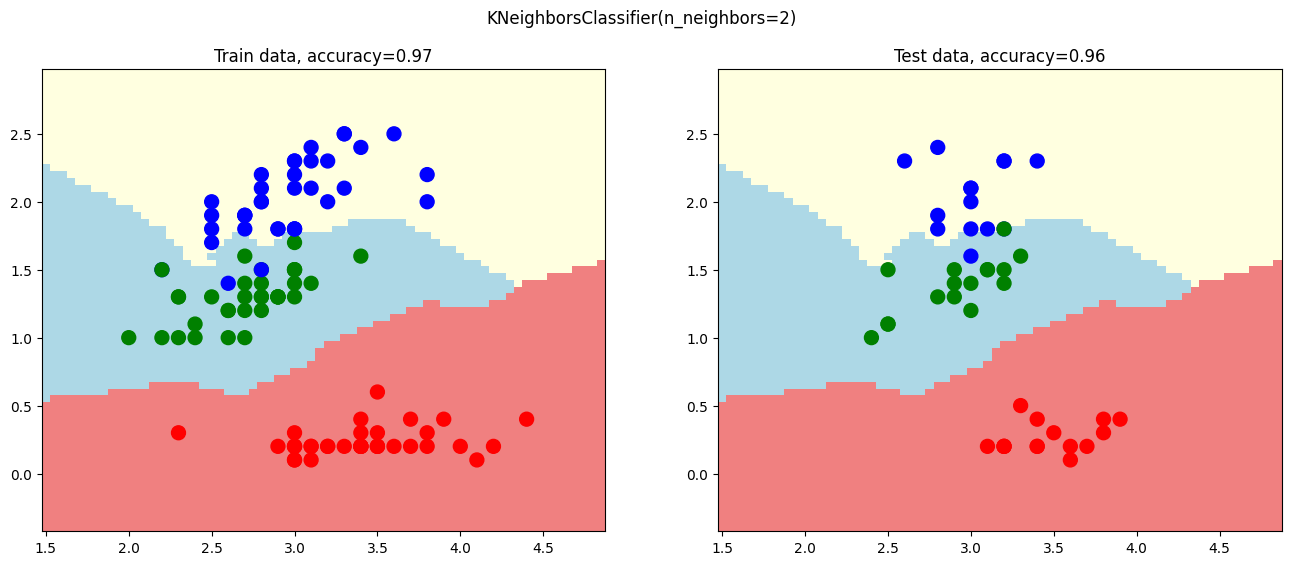

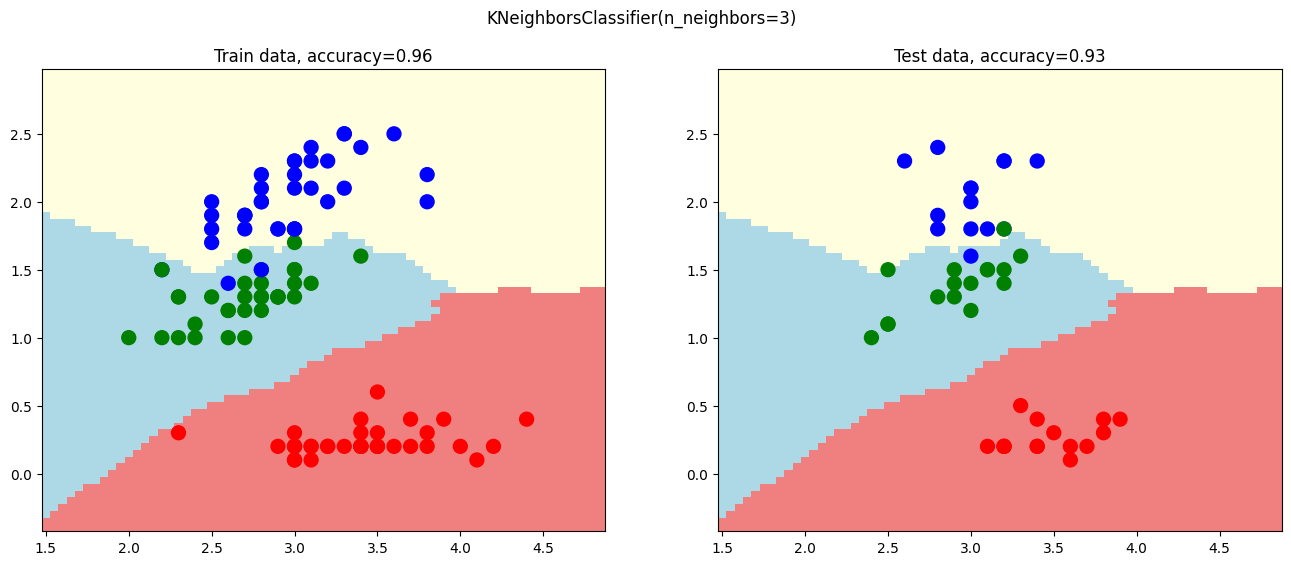

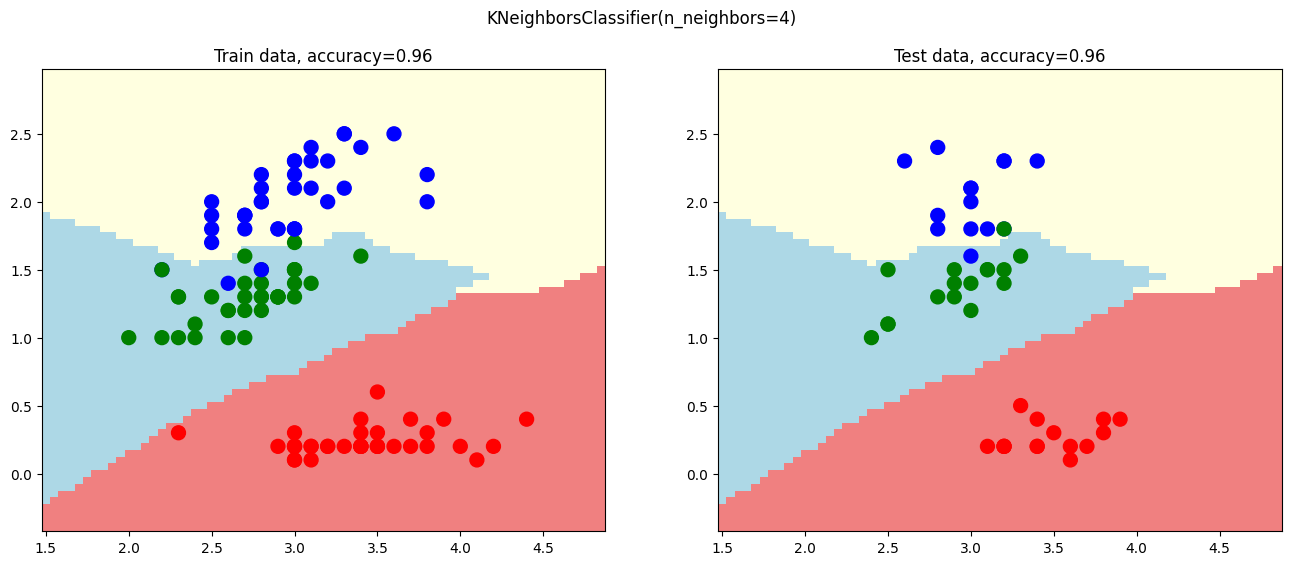

In [ ]:
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    decision_surface(knn,X_train[:,[1,3]],y_train,X_test[:,[1,3]],y_test)